PostId: 2018-12-06-162055
Title:Android用数式入力アプリ、EquationPad

以前作ってたEquationPadのAndroid版を作ろうと決意する。

コンセプトはviのような数式エディタ。

### デモ動画

[https://youtu.be/8W0TbHrf1nE](https://youtu.be/8W0TbHrf1nE)

### 以前作ってたJS版

[以前のJSのバージョンはこれ](https://gist.github.com/karino2/1951892)。
FireFoxでしか動かない上に、最初の使い方がわかりにくいかも。Setと書いてあるボタンの上のテキストフィールドに、

```
["pow", "e", "a"]
```

とかをコピペしてsetボタンを押せば、あとはヘルプ見ながらなんとなく使えると思う。

結講実用化出来てて、数式は全部これで書けばいいや、くらいに思ってたが、これはPCのキーボード必須だった。
もうPCなんて使わないのでこれでは駄目だ。

フリックとタッチで書けるように作り直そう。

# アプリ全体の話

まずは思った事をなんとなく書き出す。

最初はマッシュルームにしようと思ったが、中で文字入力をしたいので、IMEの再入が起きそう。動くかもしれないがトラブル多そうなので嫌だな。

という事で、クリップボードに入れるアプリで良かろう。
floatingが良い気がするが、最初は単独アプリでもいいかも。使ってる時はnotificationに入れときたいか？

画面としては、テキストの入力が要るので、テキストフィールドがあるのがいいか？

EquationPadのような、意味的なブロック単位の操作はそのまま継承する。

1. 左右
2. 広げる
3. 狭める
4. コピー、ペースト、

はワンタッチで入力したい。
さらにできたら下付きと上付きはワンタッチで行きたいが…

左右はフリック、広げると狭めるはピンチでいいか。

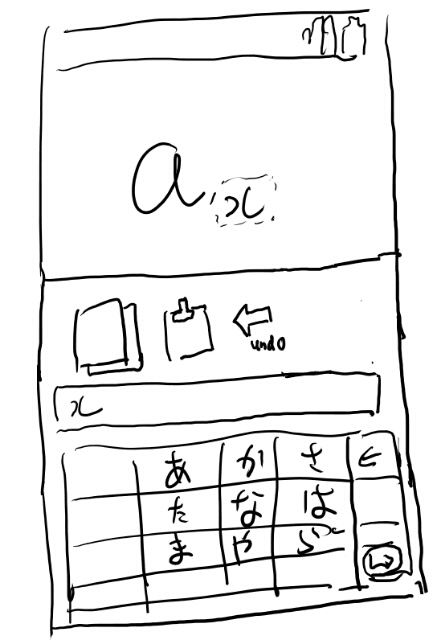

In [1]:
MeatPieImage()

こんな感じか？

数式をlatex表記した物をドルドルでくくったものをクリップボードにコピー出来る。

### 最初のマイルストーン

- 数式Viewで下付き、上付きの式の表示が出来る
- 選択、移動、範囲を広げる、縮める、の実装
- 下付き、上付きの入力
- replaceに相当する実装
- コピーとカット
- latexとの変換とクリップボードのコピー

くらいで使い物になるか。最初はヒット判定はしないで最初の要素をいつも選択する。

年末年始くらいでこの位まで行くといいな。

# 数式View

ここは結局真面目にやるのが早い気がしているが、そういう事言うと永遠に完成しない。

真面目にやる前提で最初の一歩は狭く、を目標にする。

この手のは最初が気持ちよく動かないと続かないので、web viewは使わない事にする（以前FireFoxとMathMLをスマホで評価して全然使う気にならなかったので）。

### API

APIとしては、

1. クライアントはツリーを構築する
2. Layoutでサイズとバウンディングボックスが決まる
3. RenderでViewに書く

という物を作ろう。
ヒット判定は自前でやる。

クライアントがつくるツリーとLayoutで完成するツリーがおなじ物かは良く分からない。
まずは同じで実装してみる。

レイアウトは仮想的なサイズでやって、Viewに書く時この仮想的なサイズをスケールした物で書く。

# レポジトリ

以下に置いてある。

[https://github.com/karino2/EquationPad](https://github.com/karino2/EquationPad)

# アルファ版

まずはサイコロ本のノートをとるのに使ってみる事が出来る最小セットを目指す。

とりあえず下付き、上付き、関数くらいをサポートして、texがコピー出来れば使い始められると思うので、まずはここまでを目指す。

### 数式View、最初のゴール

数式Viewの第一歩としては、下付きと上付きの添字が書ける、くらいを目標にする。
ここまででも普段の入力としてそこそこ使うので、使い心地は試せるだろう。 

とりあえず上付きと下付きが同時にあると、寄せては書けないくらいの手抜きで行きたい。

### 最初のマイルストーンに向けてのTODO、実装したものなど

実装したいもの

全部終わった！アルファ版完成！

実装した

- ツリーのレイアウト
- render
- 選択
- replace
- Subscript
- latexの出力
- クリップボードへのコピー
- 指数乗
- 関数

### 数式テスト

$${ { f(x)}_n}^n$$

$${ x_n}^2$$

$$\lambda_n$$

### 次のバージョンでほしい物

使ってて思った事をとりあえずここに書く。

- 関数

**実装した**

- alpha、lambdaなどのエンティティ解決的なの（正式名称知らん） （とりあえず自分が使う物だけ）